#PREDICCION CON APROXIMACION LINEAL

In [280]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importamos archivo desde drive

In [281]:
datos_dane = pd.read_csv('/content/drive/MyDrive/Inmersion_de_Datos/Alura_clases_InmersionDeDatos/datos_dane.csv')
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.0,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.0
1,3004369.0,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.0
2,3004375.0,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.0,NaN,11.0
3,3004380.0,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.0
4,3004383.0,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.0


#Diccionario para cambiar codigo por nombres adecuados

Con rename renombramos los codigos

In [282]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

#Agrupamos en Nombre_estrato  valores medios

In [283]:
datos_tratados = datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.893333,1.186667,1.853333,1.893333,1.560000,1.840000,1.493860e+06,1.160000,1.920000,1.680000,1.800000
Américas,1.383178,1.252336,1.981308,1.785047,1.607477,1.915888,2.672138e+06,1.056075,1.971963,1.719626,1.850467
Apogeo,1.650794,1.301587,1.746032,1.936508,1.682540,2.000000,1.837583e+06,1.079365,1.920635,1.650794,1.920635
Arborizadora,1.430108,1.301075,1.946237,1.881720,1.688172,1.838710,1.802297e+06,1.032258,1.881720,1.612903,1.817204
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.367347,1.326531,1.989796,1.979592,1.704082,1.867347,2.943731e+06,1.051020,1.948980,1.704082,1.938776
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,1.102564,1.782051,1.993590,1.974359,1.801282,1.993590,4.670897e+06,1.032051,1.980769,1.833333,1.878205
Venecia,1.527778,1.180556,1.763889,1.708333,1.500000,1.638889,2.078713e+06,1.166667,1.861111,1.597222,1.750000
Verbenal,1.228571,1.438095,1.923810,1.971429,1.752381,1.857143,2.445403e+06,1.133333,1.971429,1.733333,1.914286


#Importamos inmuebles desde drive 

In [284]:
inmuebles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inmuebles_bogota.csv')

In [285]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


#Renombramos caracteres especiales

In [286]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)

Creamos las columnas Moneda y Precio descomponiendo la columna Valor:

In [287]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
# inmuebles.sample(3)

Cambiamos en la columna Precio de string a float:

In [288]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [289]:
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [290]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles['Valor_m2_Millon'] = inmuebles['Precio_Millon']/inmuebles['Area'] 

In [291]:
datos_barrio = inmuebles.groupby('Barrio').sum()
# datos_barrio

Creamos la columna Valor_m2_Barrio:

In [292]:
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Area']
# datos_barrio

In [293]:
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])

In [294]:
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)

#UNION DE TABLAS con merge:

In [295]:
datos_ml = pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
# datos_ml.info()

In [296]:
upz = pd.read_csv('/content/drive/MyDrive/Inmersion_de_Datos/Alura_clases_InmersionDeDatos/cod_upz.csv')
datos_ml = pd.merge(datos_ml,upz,left_on='UPZ',right_on='NOMBRE_ESTRATO', how='inner')
datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000
# datos_ml.head()

In [297]:
datos_all = datos_ml.groupby('Barrio').mean()
datos_all

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Barrio,,,,,,,,,,,,,,,,,,,
Alameda,3.000000,2.000000,97.000000,580.000000,5.979381,5.979381,1.760870,1.130435,1.978261,1.891304,1.456522,1.869565,1.418653e+06,1.152174,1.978261,1.608696,1.934783,74.0,17.023832
Alhambra,3.000000,2.941176,190.411765,752.352941,4.326836,3.951189,1.331395,1.697674,1.982558,1.976744,1.773256,1.982558,3.950017e+06,1.029070,1.965116,1.744186,1.883721,20.0,47.400209
Andes Norte,3.000000,2.857143,124.857143,709.571429,6.050350,5.683066,1.164062,1.562500,1.984375,2.000000,1.679688,1.875000,3.578319e+06,1.062500,1.976562,1.750000,1.773438,25.0,42.939832
Antonio Nariño,4.312500,2.500000,163.062500,459.221875,3.530638,2.816232,1.517241,1.293103,1.965517,1.827586,1.534483,1.741379,2.356995e+06,1.103448,1.948276,1.775862,1.793103,38.0,28.283935
Barrancas,2.866667,2.133333,70.200000,314.133333,4.415957,4.474834,1.526316,1.614035,2.000000,1.982456,1.736842,1.947368,1.132380e+06,1.175439,1.929825,1.824561,1.894737,11.0,13.588555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villa Maria,4.692308,3.692308,207.153846,402.846154,2.044511,1.944671,1.666667,1.320513,1.961538,1.871795,1.525641,1.807692,7.794617e+05,1.012821,1.948718,1.551282,1.807692,28.0,9.353540
Villas De Granada,3.454545,2.318182,86.590909,282.301136,3.168840,3.260171,1.457447,1.308511,1.925532,1.904255,1.542553,1.829787,2.206707e+06,1.138298,1.925532,1.744681,1.840426,73.0,26.480487
Villemar,2.944444,2.055556,76.888889,303.833333,3.989697,3.951590,1.548780,1.560976,2.000000,1.963415,1.658537,1.817073,2.168837e+06,1.121951,1.853659,1.670732,1.817073,75.0,26.026039


In [298]:
datos_ml.shape

(9318, 27)

In [299]:
datos_ml.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio', 'UPZ',
       'Valor', 'Moneda', 'Precio', 'Precio_Millon', 'Valor_m2_Millon',
       'Valor_m2_Barrio', 'CONJUNTO_CERRADO', 'INSEGURIDAD', 'TERMINALES_BUS',
       'BARES_DISCO', 'RUIDO', 'OSCURO_PELIGROSO', 'SALARIO_MES',
       'TIENE_ESCRITURA', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'PLANES_ADQUIRIR_VIVIENDA', 'NOMBRE_ESTRATO', 'COD_UPZ_GRUPO',
       'SALARIO_ANUAL_MI'],
      dtype='object')

#Correlacionamos los datos del dataframe datos_ml

In [300]:
datos_ml.corr()

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.000000,0.482701,0.037764,0.242635,-0.212346,-0.167988,0.106556,-0.111788,-0.058626,-0.105792,-0.121043,-0.094072,-0.140876,0.059913,-0.052326,-0.098432,-0.064000,-0.083904,-0.140876
Banos,0.482701,1.000000,0.059116,0.588682,0.097389,0.166848,-0.162566,0.198801,0.160371,0.083739,0.182657,0.199769,0.207169,-0.114560,0.092082,0.158755,0.100267,0.073026,0.207169
Area,0.037764,0.059116,1.000000,0.057237,-0.032777,-0.028183,0.006530,0.007588,0.012419,0.005197,0.005005,-0.006002,-0.002390,0.004877,-0.013198,-0.004617,-0.005047,-0.000587,-0.002390
Precio_Millon,0.242635,0.588682,0.057237,1.000000,0.432279,0.302882,-0.184077,0.228074,0.155499,0.074067,0.218404,0.196658,0.285850,-0.089067,0.116185,0.195198,0.150224,0.183640,0.285850
Valor_m2_Millon,-0.212346,0.097389,-0.032777,0.432279,1.000000,0.499682,-0.319665,0.365811,0.268636,0.189522,0.362113,0.327085,0.456770,-0.190464,0.196134,0.341510,0.219731,0.269072,0.456770
Valor_m2_Barrio,-0.167988,0.166848,-0.028183,0.302882,0.499682,1.000000,-0.640062,0.660388,0.366585,0.404803,0.662978,0.583617,0.817143,-0.367054,0.310784,0.636769,0.247384,0.414486,0.817143
CONJUNTO_CERRADO,0.106556,-0.162566,0.006530,-0.184077,-0.319665,-0.640062,1.000000,-0.842878,-0.293924,-0.513481,-0.702867,-0.664394,-0.799546,0.596618,-0.347262,-0.779778,0.042382,-0.090101,-0.799546
INSEGURIDAD,-0.111788,0.198801,0.007588,0.228074,0.365811,0.660388,-0.842878,1.000000,0.502165,0.605007,0.850802,0.746699,0.813372,-0.539049,0.298773,0.736019,0.102983,0.009787,0.813372
TERMINALES_BUS,-0.058626,0.160371,0.012419,0.155499,0.268636,0.366585,-0.293924,0.502165,1.000000,0.381165,0.661040,0.571029,0.516036,-0.289043,0.176953,0.351956,0.257145,0.110817,0.516036
BARES_DISCO,-0.105792,0.083739,0.005197,0.074067,0.189522,0.404803,-0.513481,0.605007,0.381165,1.000000,0.598574,0.513241,0.379015,-0.250765,-0.017679,0.335006,-0.053785,-0.263423,0.379015


In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

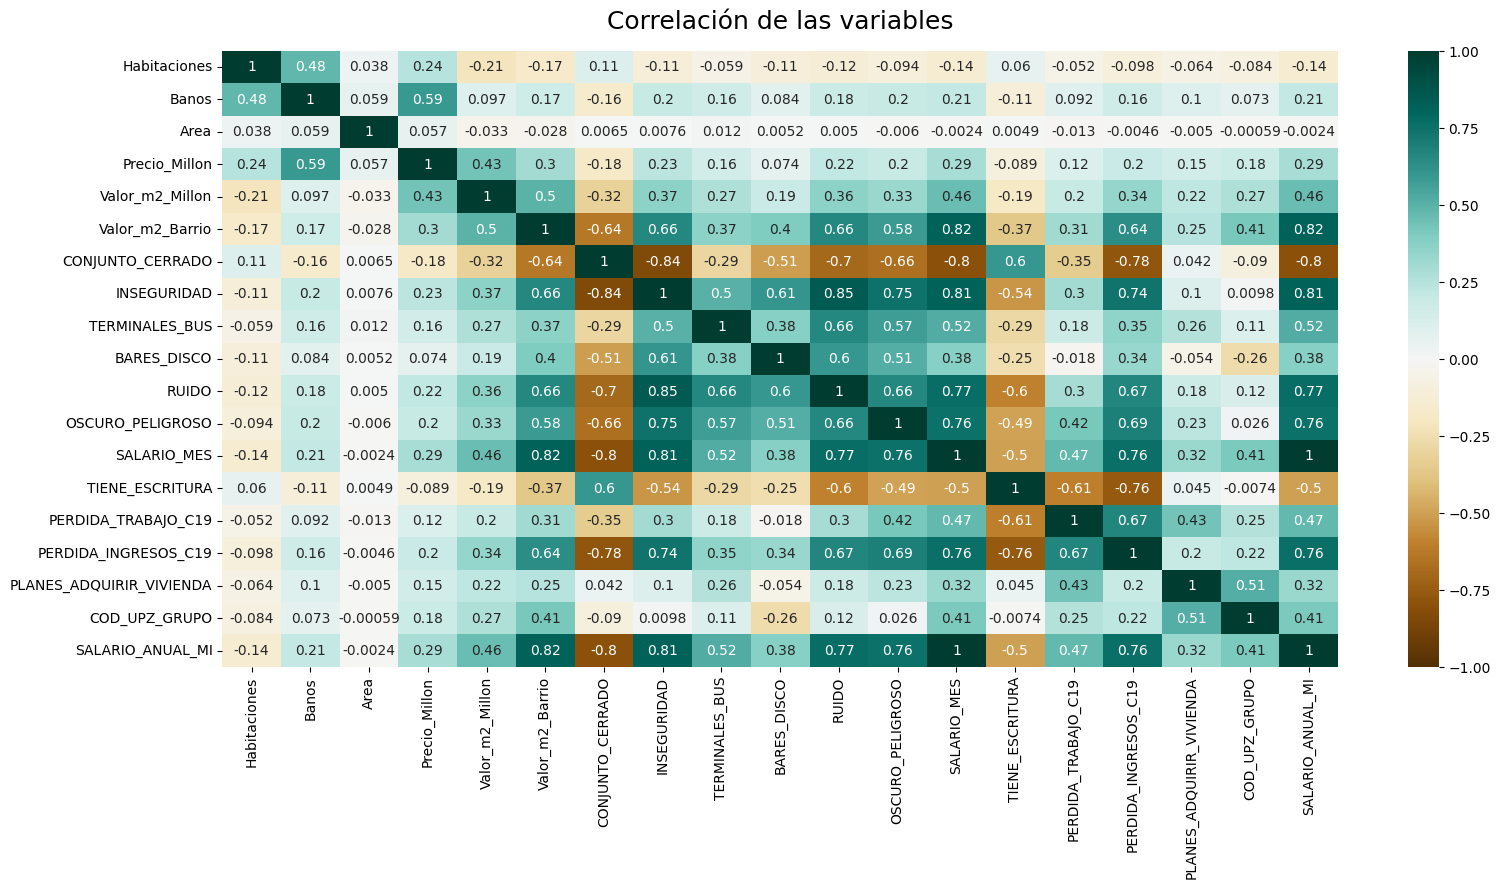

In [302]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

#Grafica del salario anual en millones:

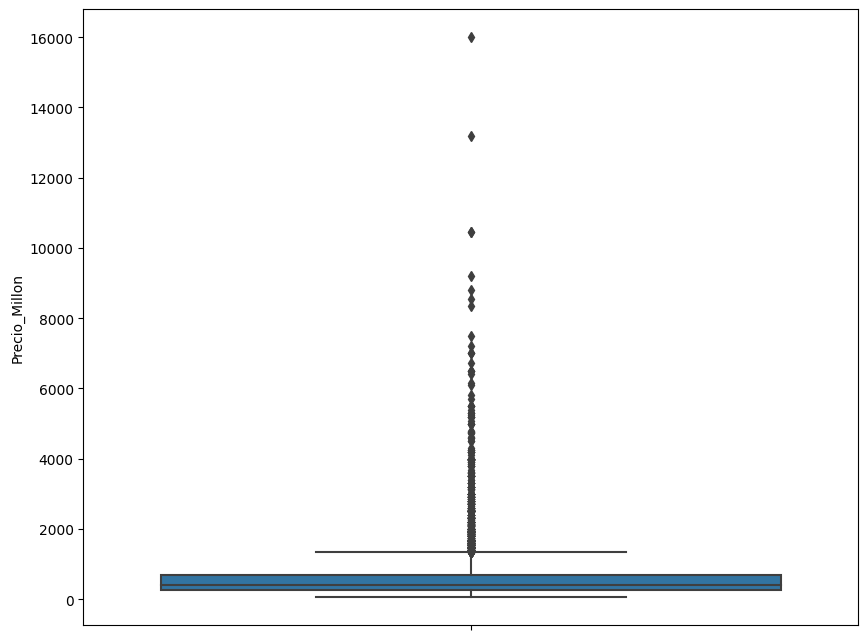

In [303]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio_Millon')
plt.show()

* Se observa en grafica anterior que la concentracion de valores se encuentra por debajo de los 2000.

#Gráficas que relaciona el Salario anual con el valor de inmuebles:

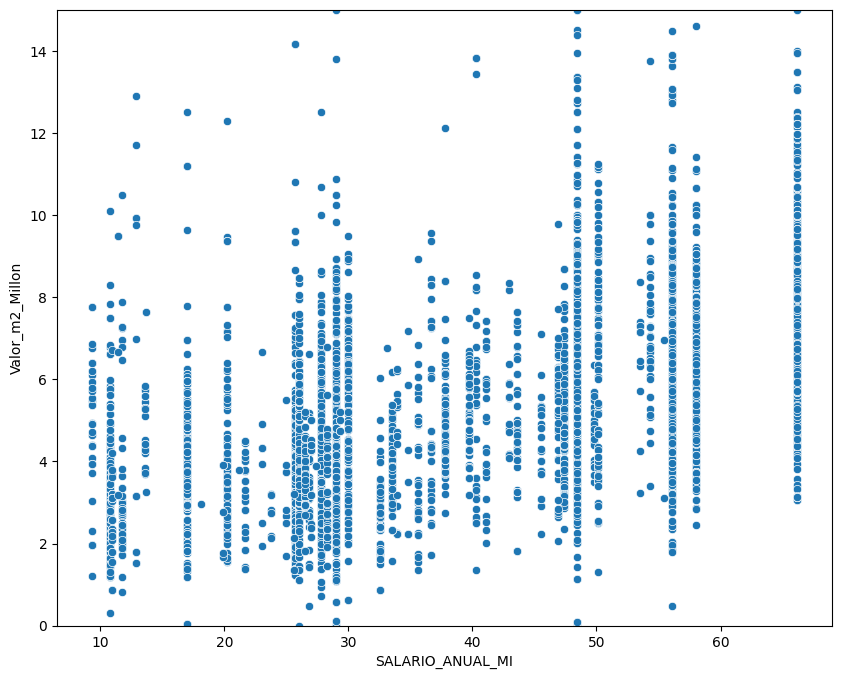

In [305]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml, x='SALARIO_ANUAL_MI',y ='Valor_m2_Millon')
plt.ylim((0,15))
plt.show()

# Selección de variables que conformaran la lista para luego realizar la aproximacion lineal, de acuerdo al valor de busqueda (ej. Precio_Millon) teniendo en cuenta el diagrama de correlaciones.

In [306]:
# #EJERCICIO N 1:
# # Ingreso los datos de referencia para la aproximacion lineal:
# y_data='SALARIO_ANUAL_MI'
# list_iterable = ['COD_UPZ_GRUPO','Precio_Millon','Valor_m2_Barrio','OSCURO_PELIGROSO','RUIDO','INSEGURIDAD']

In [307]:
#EJERCICIO N 2:
# Ingreso los datos de referencia para la aproximacion lineal:
y_data = 'Precio_Millon'
list_iterable = ['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']

#LIMITACION DEL RANGO DE VALORES DE PRECIO_MILLON

De acuerdo a los datos aportados por la grafica boxplot(data=datos_ml, y = 'Precio_Millon')

In [341]:
datos_ml = datos_ml.query('Precio_Millon < 2000 & Precio_Millon > 60')
# datos_ml

 R2 mide lo bien que un modelo de regresión se ajusta a los datos reales. En otras palabras, se trata de una medida de la precisión general del modelo. R al cuadrado es también conocido como el coeficiente de determinación.Su valor oscila entre 0 y 1.

# VALIDACION CRUZADA BUSCANDO:

In [342]:
print(y_data)

Precio_Millon


In [343]:
#Se realiza la validacion cruzada conla lista completa si buscar mejores resultados aún:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X = datos_ml[['COD_UPZ_GRUPO','Valor_m2_Barrio','OSCURO_PELIGROSO','RUIDO','INSEGURIDAD']]
# X = datos_ml[list_iterable]
y = datos_ml[y_data]

modelo = LinearRegression()
scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
print("R^2 promedio: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


R^2 promedio: 0.06 (+/- 0.13)


El resultado:  R^2 promedio: 0.07 (+/- 0.16)

R^2 promedio de 0.07 indica que el modelo explica solo el 7% de la falta en los datos de prueba. Es decir, el modelo no es muy bueno para hacer predicciones precisas. Sin embargo, el hecho de que el intervalo de confianza sea relativamente pequeño (0.16) sugiere que el modelo es bastante estable y confiable, ya que los valores de R^2 obtenidos en diferentes iteraciones de la validación cruzada no varían significativamente. Por lo tanto, aunque el rendimiento del modelo no es excelente, al menos es consistente.

#ITERADOR: construccion de lista con combinaciones posibles de los nombres de columnas analizados en el diagrama de correlaciones. Considero un minimo de 3 valores y un maximo igual al numero de nombres selecionados, por ejemplo:

para: y = datos_ml["SALARIO_ANUAL_MI"]


      X = datos_ml[['COD_UPZ_GRUPO','Precio_Millon','Valor_m2_Barrio','OSCURO_PELIGROSO','RUIDO','INSEGURIDAD']] 


In [344]:
import itertools

datos= list_iterable

# Generar todas las combinaciones posibles de 3 a n elementos
combinaciones = []
for i in range(3, len(datos) + 1):
    for combo in itertools.combinations(datos, i):
        # Verificar que siempre esté presente el elemento 'COD_UPZ_GRUPO'
        if 'COD_UPZ_GRUPO' in combo:
            # combinaciones.append(combo)
            combinaciones.append(list(combo))

print(combinaciones)


[['COD_UPZ_GRUPO', 'Habitaciones', 'Banos'], ['COD_UPZ_GRUPO', 'Habitaciones', 'CONJUNTO_CERRADO'], ['COD_UPZ_GRUPO', 'Habitaciones', 'SALARIO_ANUAL_MI'], ['COD_UPZ_GRUPO', 'Habitaciones', 'TIENE_ESCRITURA'], ['COD_UPZ_GRUPO', 'Banos', 'CONJUNTO_CERRADO'], ['COD_UPZ_GRUPO', 'Banos', 'SALARIO_ANUAL_MI'], ['COD_UPZ_GRUPO', 'Banos', 'TIENE_ESCRITURA'], ['COD_UPZ_GRUPO', 'CONJUNTO_CERRADO', 'SALARIO_ANUAL_MI'], ['COD_UPZ_GRUPO', 'CONJUNTO_CERRADO', 'TIENE_ESCRITURA'], ['COD_UPZ_GRUPO', 'SALARIO_ANUAL_MI', 'TIENE_ESCRITURA'], ['COD_UPZ_GRUPO', 'Habitaciones', 'Banos', 'CONJUNTO_CERRADO'], ['COD_UPZ_GRUPO', 'Habitaciones', 'Banos', 'SALARIO_ANUAL_MI'], ['COD_UPZ_GRUPO', 'Habitaciones', 'Banos', 'TIENE_ESCRITURA'], ['COD_UPZ_GRUPO', 'Habitaciones', 'CONJUNTO_CERRADO', 'SALARIO_ANUAL_MI'], ['COD_UPZ_GRUPO', 'Habitaciones', 'CONJUNTO_CERRADO', 'TIENE_ESCRITURA'], ['COD_UPZ_GRUPO', 'Habitaciones', 'SALARIO_ANUAL_MI', 'TIENE_ESCRITURA'], ['COD_UPZ_GRUPO', 'Banos', 'CONJUNTO_CERRADO', 'SALARIO_ANU

In [345]:
print(len(combinaciones),' combinaciones posibles.')

26  combinaciones posibles.


**#VALIDACION CRUZADA:**

Busqueda de la mejor combinacion de variables:

1-se crea una lista de todas las combinaciones posibles con los mejores datos observados en el diagrama de Correlación de las variables:datos = ['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA'].

2-Luego, con ciclos for recorremos todas las combinaciones, logrando generar todos los datos de score_mean y score_std en listas correspondientes.

3-Se iteran los valores de score_mean (busqueda del máximo) con los valores de score_std (busqueda del mínimo) obteniendo el index correspodiente.

4-Con el index encontrado busco en la lista de combinaciones correspondiente obteniendo, por ejemplo: mejor_combinacion=['COD_UPZ_GRUPO', 'Banos', 'SALARIO_ANUAL_MI'].



In [346]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

list_r2_mean=[]
list_r2_std=[]
# len_datos=len(datos)

# for i in range(0,len_datos):
len_combinaciones=len(combinaciones)
for e in range(len_combinaciones):
  X = datos_ml[combinaciones[e]]
  y = datos_ml[y_data]

  modelo = LinearRegression()
  scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
    
  list_scores_mean=list([scores.mean()])
  list_scores_std=list([scores.std()*2])

  list_r2_mean.append(list_scores_mean)
  list_r2_std.append(list_scores_std)

#Creo un df que contenga los calores de scores_mean y scores_std:

In [347]:
df_r2=pd.DataFrame([list_r2_mean,list_r2_std])
df_invertido = df_r2.T
df_invertido.columns=['mean','std']
# df_invertido.info()

In [348]:
# Inicializar las variables para el valor máximo y mínimo encontrados hasta el momento y su índice
max_mean = -float('inf')
min_std = float('inf')
index = None

# Iterar por cada fila del DataFrame
for i, row in df_invertido.iterrows():
    # Obtener los valores de la columna 'mean' y 'std' de la fila actual
    mean_value = row['mean'][0]
    std_value = row['std'][0]
    
    # Comparar los valores actuales con los máximos y mínimos encontrados hasta el momento
    if mean_value > max_mean and std_value < min_std:
        max_mean = mean_value
        min_std = std_value
        index = i

# Imprimir el índice encontrado
print(f"El índice es: {index} (para la mejor combinacion de score_mean y score_std de la validacion cruzada)")


El índice es: 11 (para la mejor combinacion de score_mean y score_std de la validacion cruzada)


In [349]:
mejor_combinacion=combinaciones[index]
mejor_combinacion

['COD_UPZ_GRUPO', 'Habitaciones', 'Banos', 'SALARIO_ANUAL_MI']

In [350]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

#VERIFICACION CON VALIDACION CRUZADA:

In [358]:
X = datos_ml[mejor_combinacion]
y = datos_ml[y_data]

modelo = LinearRegression()
scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

print(e,"R^2 promedio: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

25 R^2 promedio: 0.48 (+/- 0.05)


In [352]:
mejor_combinacion

['COD_UPZ_GRUPO', 'Habitaciones', 'Banos', 'SALARIO_ANUAL_MI']

# REGRESION LINEAL: aplicamos mejor combinacion obtenida de la validacion cruzada.

In [353]:
X = datos_ml[mejor_combinacion]
y = datos_ml[y_data]

lista_r2_test=[]
lista_r2_test_i=[]
lista_r2_train=[]
lista_r2_train_i=[]

for i in range(10,40):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state = 99)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
  modelo_2 = LinearRegression()
  modelo_2.fit(X_train, y_train)

  y_predict_test = modelo_2.predict(X_test)
  y_predict_train = modelo_2.predict(X_train)

  mae_test = mean_absolute_error(y_test, y_predict_test)
  r2_test = r2_score(y_test, y_predict_test)
  mae_train = mean_absolute_error(y_train, y_predict_train)
  r2_train = r2_score(y_train, y_predict_train)

# Busco los mayores valores de r2 en test y train:
  lista_r2_test_i.append([i,r2_test])
  lista_r2_train_i.append([i,r2_train])
  # print('i:',i,'  mae_test: ',round(mae_test,4) ,'r2_test: ',round(r2_test,4) ,'--------','mae_train: ',round(mae_train,4),'r2_train: ', round(r2_train,4))

#Con los datos obtenido buscamos un valor intermedio para el test_size:

In [354]:
maximo_lista_r2_test_i = max(lista_r2_test_i, key=lambda x:x[1])
maximo_lista_r2_train_i = max(lista_r2_train_i, key=lambda x:x[1])

# Busco el valor medio entre los mejores valores de test_size de test y de train:
mean_test_size=((maximo_lista_r2_test_i[0]+maximo_lista_r2_train_i[0])/200)

print("TEST:   Posición: ", maximo_lista_r2_test_i[0]," ----  Valor máximo: ", round(maximo_lista_r2_test_i[1],4))
print("TRAIN   Posición: ", maximo_lista_r2_train_i[0]," ----  Valor máximo: ", round(maximo_lista_r2_train_i[1],4))

print('El valor optimo test_size es: ',mean_test_size)

TEST:   Posición:  17  ----  Valor máximo:  0.5848
TRAIN   Posición:  39  ----  Valor máximo:  0.5452
El valor optimo test_size es:  0.28


In [355]:
#Aproximación lineal con el mejor valor de test_size:

X = datos_ml[mejor_combinacion] 
y = datos_ml[y_data]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = mean_test_size, random_state = 99)

modelo_09 = LinearRegression()
modelo_09.fit(X_train, y_train)

y_predict_test = modelo_09.predict(X_test)
y_predict_train = modelo_09.predict(X_train)

mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)  


r2_test_porciento=round((r2_test),4)
r2_train_porciento=round((r2_train),4)

print('Los datos utilizados fueron: ',mejor_combinacion)
print('mae_test: $',round(mae_test,2) ,'   r2_test: ',r2_test_porciento)
print('mae_train: $',round(mae_train,2),'   r2_train: ', r2_train_porciento)

Los datos utilizados fueron:  ['COD_UPZ_GRUPO', 'Habitaciones', 'Banos', 'SALARIO_ANUAL_MI']
mae_test: $ 163.37    r2_test:  0.5497
mae_train: $ 171.38    r2_train:  0.5366


In [357]:
modelo_09.predict([[816,3,3,40]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([684.11056231])